# **Api de RICK y MORTY**
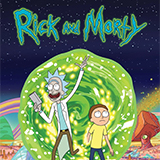

In [2]:
import requests

**Declaración de funciones utilizadas:**

-recorrer: Recorre el json para añadirlos a una lista y permite realizar en bucle con un campo defecto

-get_json: Mediante una URL devuelve el json cargado

-get_apis_untilnext: Recorre los Json uno a uno hasta que ya no haya página siguiente

In [3]:
import json


def recorrer(data,listaValores,campo,bucle=True):
    for valor in data:
        if bucle:
            for valor2 in valor[campo]:
                if valor2 not in listaValores:
                    listaValores.append(valor2)
        else:
            listaValores.append(valor)
    return listaValores

def get_json(url):
     return json.loads(json.dumps((requests.get(url)).json()))

def get_apis_untilnext(json,list,text=None,recursive=False):
    while True:
        list=recorrer(json['results'],list,text,recursive)
        if(json['info']['next'] == None):
             break
        print(json["info"]["next"])
        json=get_json(json['info']['next'])
    return list


Aquí tenemos el código que devolverá la lista de Personajes y la lista de episodios de forma asincrona

In [4]:
#from collections import deque

import concurrent.futures
from pprint import pprint
import threading

listaPersonajes=[]
listaEpisodios=[]


"""
    Si tuvieramos más páginas de episodios nos interesaría que fuera multihilo para dividir la gestión de los JSON
    pero al ser solo 3 páginas de episodios no hace falta crear un ThreadPool

    -Get json utiliza una URL para devolver el json de ella
    -Se utiliza multihilo ya que las dos apis las recojo de manera independiente para aumentar la velocidad y que se gestione cada una por separado sin esperar que la otra acabe
"""
tEp=threading.Thread(target=get_apis_untilnext,args=[get_json("https://rickandmortyapi.com/api/episode/"),listaEpisodios,])
tPer=threading.Thread(target=get_apis_untilnext,args=[get_json("https://rickandmortyapi.com/api/character/"),listaPersonajes,])
tEp.start()
tPer.start()
tEp.join()
tPer.join()
#get_apis_untilnext(get_json("https://rickandmortyapi.com/api/episode/"),listaEpisodios,"name",False)
#get_apis_untilnext(get_json("https://rickandmortyapi.com/api/character/"),listaPersonajes,"name",False)
#with concurrent.futures.ThreadPoolExecutor() as executor:
#    threadEp=executor.submit(get_apis_untilnext,args=[get_json("https://rickandmortyapi.com/api/episode/"),listaEpisodios,"name",False])
#    threadPer=executor.submit(get_apis_untilnext,args=[get_json("https://rickandmortyapi.com/api/character/"),listaPersonajes,"name",False])
#    listaEpisodios=threadEp.result()
#    listaPersonajes=threadPer.result()


https://rickandmortyapi.com/api/episode/?page=2
https://rickandmortyapi.com/api/character/?page=2
https://rickandmortyapi.com/api/episode/?page=3
https://rickandmortyapi.com/api/character/?page=3
https://rickandmortyapi.com/api/character/?page=4
https://rickandmortyapi.com/api/character/?page=5
https://rickandmortyapi.com/api/character/?page=6
https://rickandmortyapi.com/api/character/?page=7
https://rickandmortyapi.com/api/character/?page=8
https://rickandmortyapi.com/api/character/?page=9
https://rickandmortyapi.com/api/character/?page=10
https://rickandmortyapi.com/api/character/?page=11
https://rickandmortyapi.com/api/character/?page=12
https://rickandmortyapi.com/api/character/?page=13
https://rickandmortyapi.com/api/character/?page=14
https://rickandmortyapi.com/api/character/?page=15
https://rickandmortyapi.com/api/character/?page=16
https://rickandmortyapi.com/api/character/?page=17
https://rickandmortyapi.com/api/character/?page=18
https://rickandmortyapi.com/api/character/?pa

In [5]:
import pandas as pd


dfEpisodios = pd.DataFrame(listaEpisodios)
dfEpisodios

,id,name,air_date,episode,characters,url,created
0,1,Pilot,"December 2, 2013",S01E01,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/1,2017-11-10T12:56:33.798Z
1,2,Lawnmower Dog,"December 9, 2013",S01E02,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/2,2017-11-10T12:56:33.916Z
2,3,Anatomy Park,"December 16, 2013",S01E03,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/3,2017-11-10T12:56:34.022Z
3,4,M. Night Shaym-Aliens!,"January 13, 2014",S01E04,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/4,2017-11-10T12:56:34.129Z
4,5,Meeseeks and Destroy,"January 20, 2014",S01E05,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/5,2017-11-10T12:56:34.236Z
5,6,Rick Potion #9,"January 27, 2014",S01E06,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/6,2017-11-10T12:56:34.339Z
6,7,Raising Gazorpazorp,"March 10, 2014",S01E07,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/7,2017-11-10T12:56:34.441Z
7,8,Rixty Minutes,"March 17, 2014",S01E08,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/8,2017-11-10T12:56:34.543Z
8,9,Something Ricked This Way Comes,"March 24, 2014",S01E09,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/9,2017-11-10T12:56:34.645Z
9,10,Close Rick-counters of the Rick Kind,"April 7, 2014",S01E10,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/10,2017-11-10T12:56:34.747Z


In [6]:
dfPersonajes = pd.DataFrame(listaPersonajes)
dfPersonajes

,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z
...,...,...,...,...,...,...,...,...,...,...,...,...
821,822,Young Jerry,unknown,Human,,Male,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/822,2021-11-02T17:18:31.934Z
822,823,Young Beth,unknown,Human,,Female,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/823,2021-11-02T17:19:00.951Z
823,824,Young Beth,unknown,Human,,Female,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/824,2021-11-02T17:19:47.957Z
824,825,Young Jerry,unknown,Human,,Male,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/825,2021-11-02T17:20:14.305Z
